# Predict Defaulter and Credit Risk Analytics status using Machine Learning

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing (Feature Engineering and Feature Selection)
- Model Training
- Hypeparameter Tuning
- Choose best model

### 1. Problem statement
- The problem statement is build a predictive model that can accurately predict whether a customer is likely to default on their credit card payments in the future based on their past credit card usage behavior and demographic information. This is a classification problem with the target variable being "default", which takes binary values of 1 (defaulted) and 0 (never defaulted).

### 2. Data Collection
- Dataset Source - Geeklurn

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Exploring the Data

In [24]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import LabelEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import pickle




#### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv("/config/workspace/dataset/bankloans.csv")

#### Show Top 5 Records

In [12]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


#### Shape of the DataFrame

In [13]:
df.shape

(850, 9)

#### DataFrame have 850 rows & 09 columns.

#### 3.1 Missing values

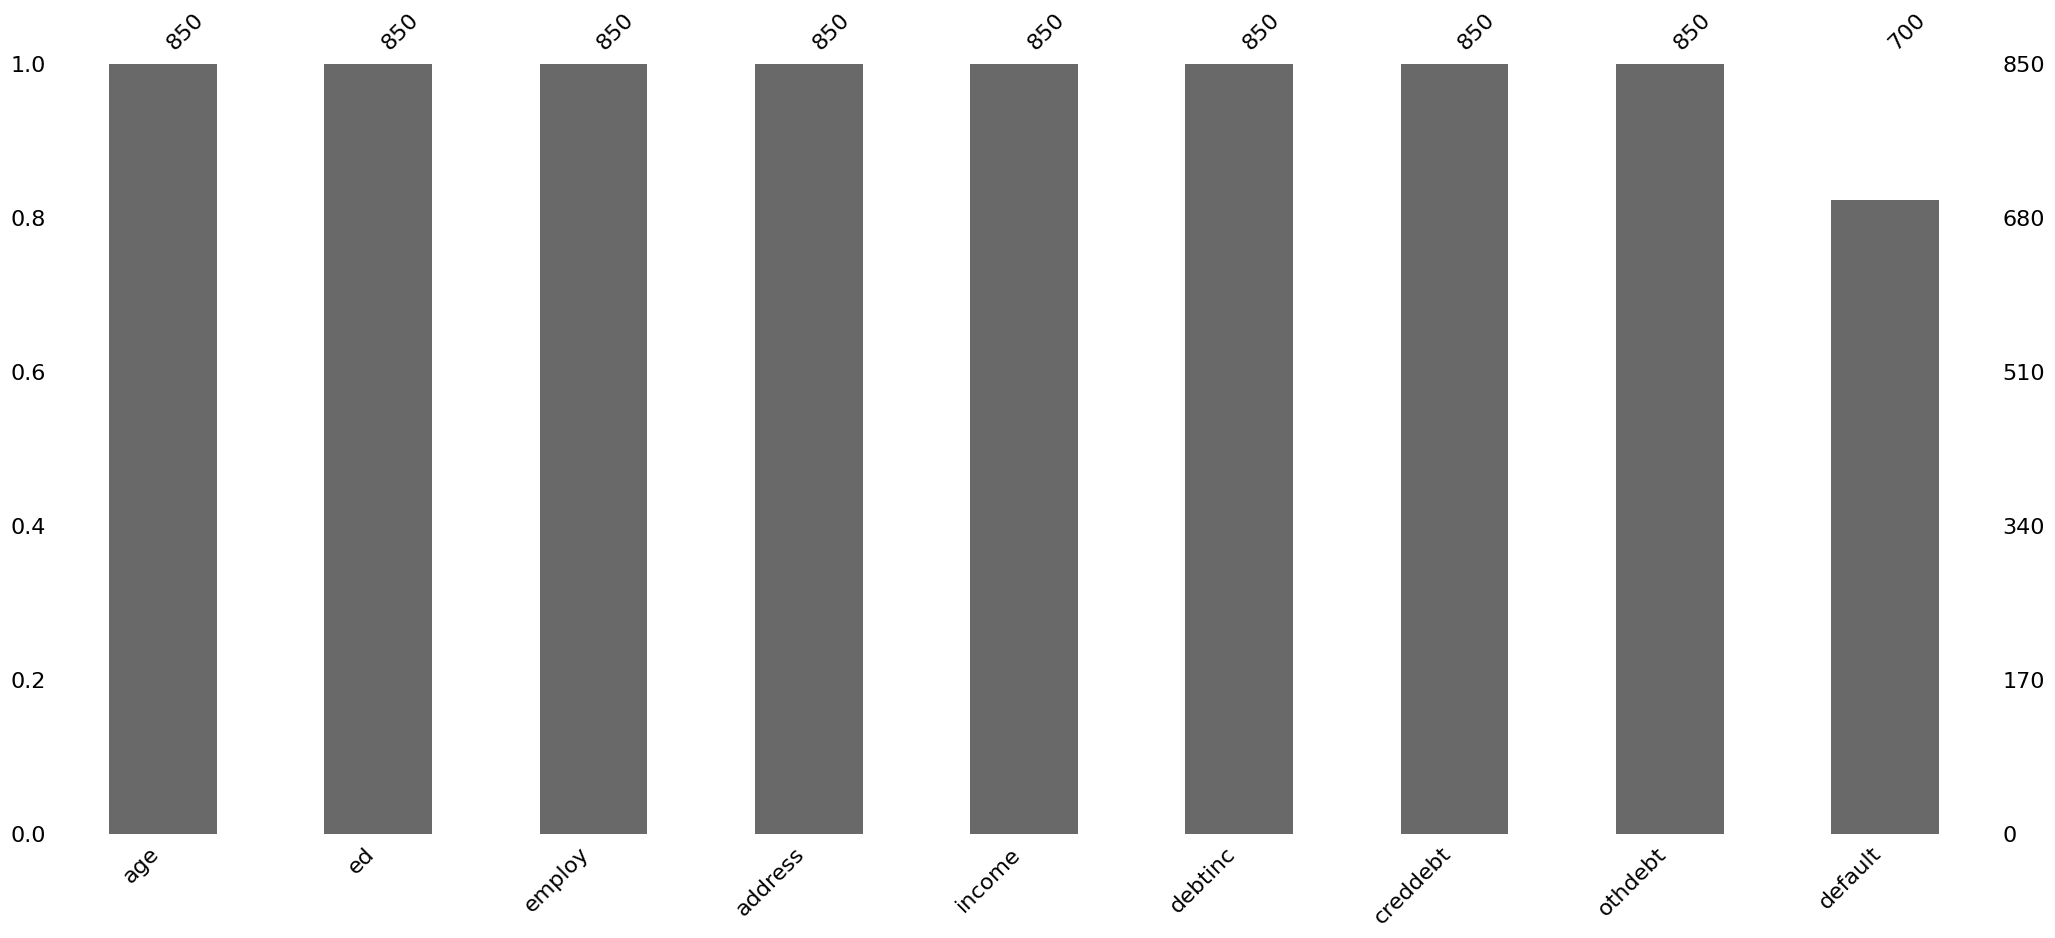

In [14]:
# plot the missing value matrix
msno.bar(df)

#### Insights:

- There are some records missing in default column.

#### 3.2 Duplicate values

In [6]:
## Check Duplicates
df.duplicated().sum()

0

#### Insights:
- There are no duplicates values in the dataset

#### 3.3 Check data type

In [7]:
df.info(verbose = 'TRUE')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


#### Insights:

- The columns 'age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', and 'othdebt' are numerical features while the column 'default' is a categorical feature.
- The 'default' column has 700 non-null values, which means that there are 150 missing values in this column.
- The column 'default' represents whether a customer has defaulted in the past or not. It contains binary values: 1 for customers who have defaulted and 0 for customers who have never defaulted.

#### 3.4 Checking the number of uniques values of each columns

In [8]:
df.nunique()

age          37
ed            5
employ       33
address      32
income      129
debtinc     245
creddebt    842
othdebt     848
default       2
dtype: int64

#### Insights:

- The age column has 37 unique values.
- The ed column has 5 unique values.
- The employ column has 33 unique values.
- The address column has 32 unique values.
- The income column has 129 unique values.
- The debtinc column has 245 unique values.
- The creddebt column has 842 unique values.
- The othdebt column has 848 unique values.
- The default column has 2 unique values, indicating that it is a binary categorical variable with 2 possible values: 0 and 1.

#### 3.5 Check the statistics of the dataset

In [9]:
styled_table = df.describe().T.style.bar(subset=['mean'], color='#205ff2') \
               .background_gradient(subset=['std'], cmap='Reds') \
               .background_gradient(subset=['50%'], cmap='coolwarm')

styled_table


,count,mean,std,min,25%,50%,75%,max
age,850.000000,35.029412,8.041432,20.000000,29.000000,34.000000,41.000000,56.000000
ed,850.000000,1.710588,0.927784,1.000000,1.000000,1.000000,2.000000,5.000000
employ,850.000000,8.565882,6.777884,0.000000,3.000000,7.000000,13.000000,33.000000
address,850.000000,8.371765,6.895016,0.000000,3.000000,7.000000,12.000000,34.000000
income,850.000000,46.675294,38.543054,13.000000,24.000000,35.000000,55.750000,446.000000
debtinc,850.000000,10.171647,6.719441,0.100000,5.100000,8.700000,13.800000,41.300000
creddebt,850.000000,1.576805,2.125840,0.011696,0.382176,0.885091,1.898440,20.561310
othdebt,850.000000,3.078789,3.398803,0.045584,1.045942,2.003243,3.903001,35.197500
default,700.000000,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.000000


#### Insights:

- The mean age of the customers is 35 years old, with a minimum age of 20 and a maximum of 56.
- The customers have an average of 1.71 years of education, with a minimum of 1 and a maximum of 5 years.
- The average employment duration is 8.57 years, with a minimum of 0 years and a maximum of 33 years.
- The average number of years the customers have stayed at their current address is 8.37 years, with a minimum of 0 years and a maximum of 34 years.
- The average income of the customers is 46.68 thousand dollars, with a minimum income of 13 thousand dollars and a maximum income of 446 - thousand dollars.
- The average debt-to-income ratio is 10.17, with a minimum ratio of 0.1 and a maximum ratio of 41.3.
- The average credit card debt is 1.58 thousand dollars, with a minimum of 0.01 thousand dollars and a maximum of 20.56 thousand dollars.
- The average other debt (excluding credit card debt) is 3.08 thousand dollars, with a minimum of 0.05 thousand dollars and a maximum of 35.2 thousand dollars.
- The default column has missing values, with a count of 700 non-null values out of 850 total values. Among the non-missing values, the average default rate is 0.26, indicating that around 26% of the customers have defaulted in the past.


In [10]:
#define numerical and catagorical columns
num_features = [features for features in df.columns if df[features].dtype != 'O']
cat_features = [features for features in df.columns if df[features].dtype == 'O']


In [11]:
print('we have {} numerical features : {}'.format(len(num_features), num_features))
print('\n we have {} categorical features : {}'.format(len(cat_features), cat_features))

we have 9 numerical features : ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']

 we have 0 categorical features : []


In [12]:
df.columns.values

array(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'], dtype=object)

### 4. Exploratory data analysis

In [15]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

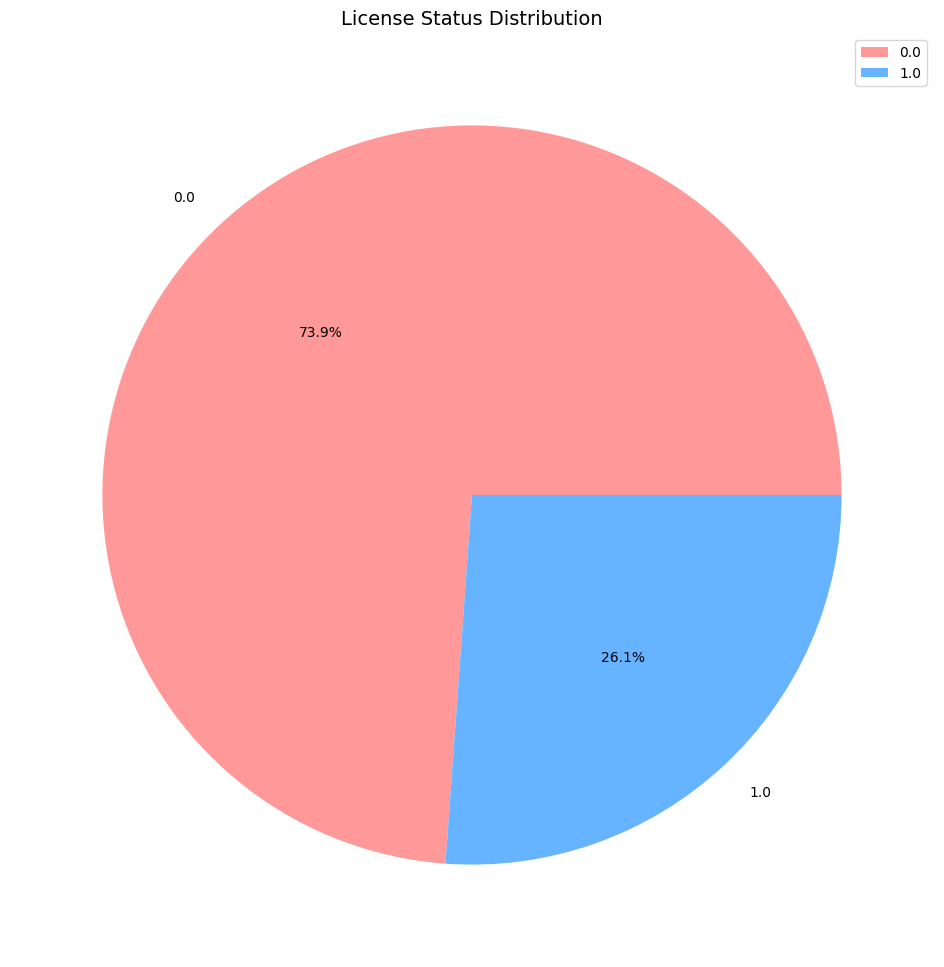

In [14]:
# Set the color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Create a pie chart with customizations
plt.figure(figsize=(12,12))
plt.pie(df['default'].value_counts(), labels=df['default'].value_counts().index, colors=colors, autopct='%1.1f%%')
plt.title('License Status Distribution', fontsize=14)

# Add a legend
plt.legend(loc='upper right', labels=df['default'].value_counts().index)




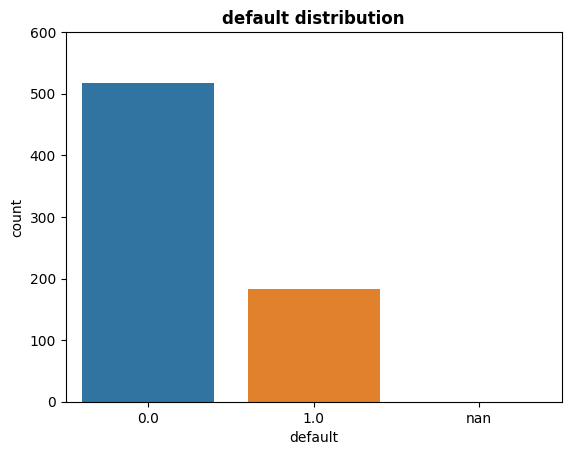

In [15]:
fig, ax = plt.subplots()
sns.countplot(x='default', data=df, order=sorted(df['default'].unique()), ax=ax)
ax.set_ylim(0, 600)
ax.set_title('default distribution', weight='bold')
plt.show()


In [16]:
nan_df = df[df.isna().any(axis=1)]
print(nan_df)



     age  ed  employ  address  income  debtinc  creddebt   othdebt  default
700   36   1      16       13      32     10.9  0.544128  2.943872      NaN
701   50   1       6       27      21     12.9  1.316574  1.392426      NaN
702   40   1       9        9      33     17.0  4.880700  0.729300      NaN
703   31   1       5        7      23      2.0  0.046000  0.414000      NaN
704   29   1       4        0      24      7.8  0.866736  1.005264      NaN
..   ...  ..     ...      ...     ...      ...       ...       ...      ...
845   34   1      12       15      32      2.7  0.239328  0.624672      NaN
846   32   2      12       11     116      5.7  4.026708  2.585292      NaN
847   48   1      13       11      38     10.8  0.722304  3.381696      NaN
848   35   2       1       11      24      7.8  0.417456  1.454544      NaN
849   37   1      20       13      41     12.9  0.899130  4.389870      NaN

[150 rows x 9 columns]


###  Bivariate analysis

<Axes: xlabel='age', ylabel='count'>

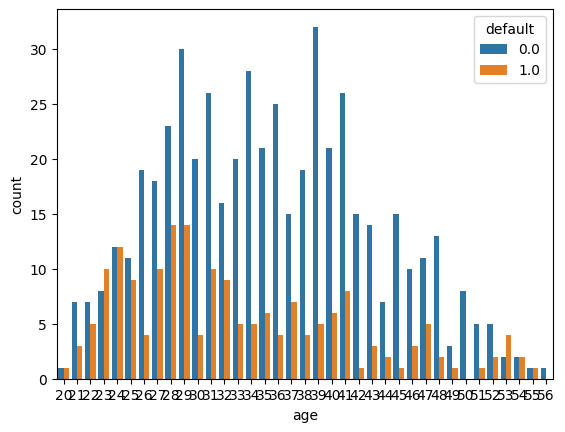

In [18]:
sns.countplot(data=df, x='age', hue='default')

<Axes: xlabel='ed', ylabel='count'>

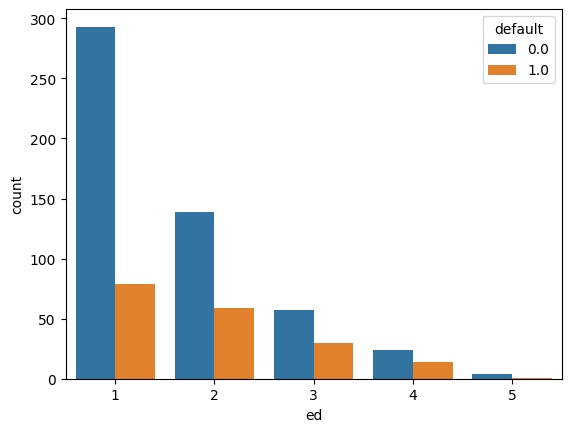

In [19]:
sns.countplot(data=df, x='ed', hue='default')

#### Insight:

- Eduacation level 1 have signifiantly more defulter than Eduacation level 5.
- The lower the educattion level the higher the defulter rate.

<Axes: xlabel='age', ylabel='income'>

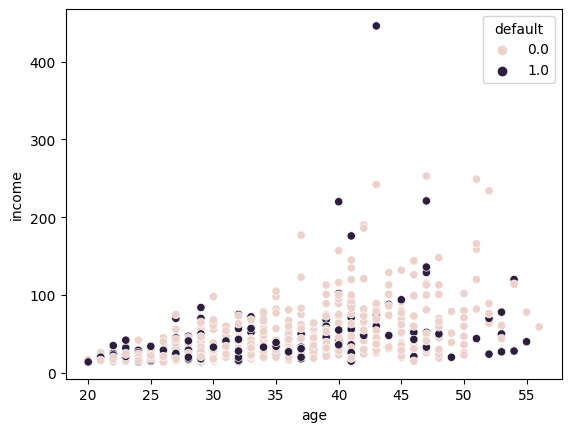

In [20]:
sns.scatterplot(data=df, x='age', y='income', hue='default')

<Axes: xlabel='ed', ylabel='income'>

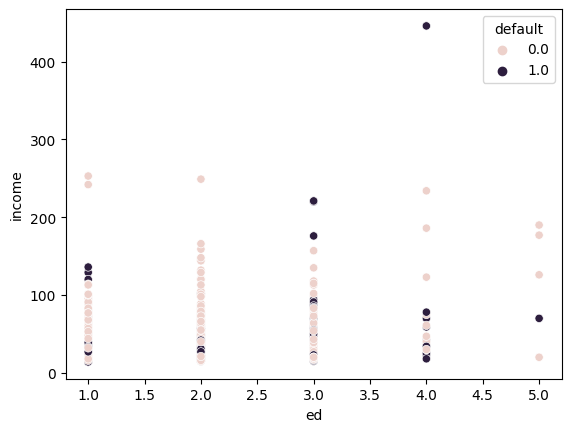

In [21]:
sns.scatterplot(data=df, x='ed', y='income', hue='default')

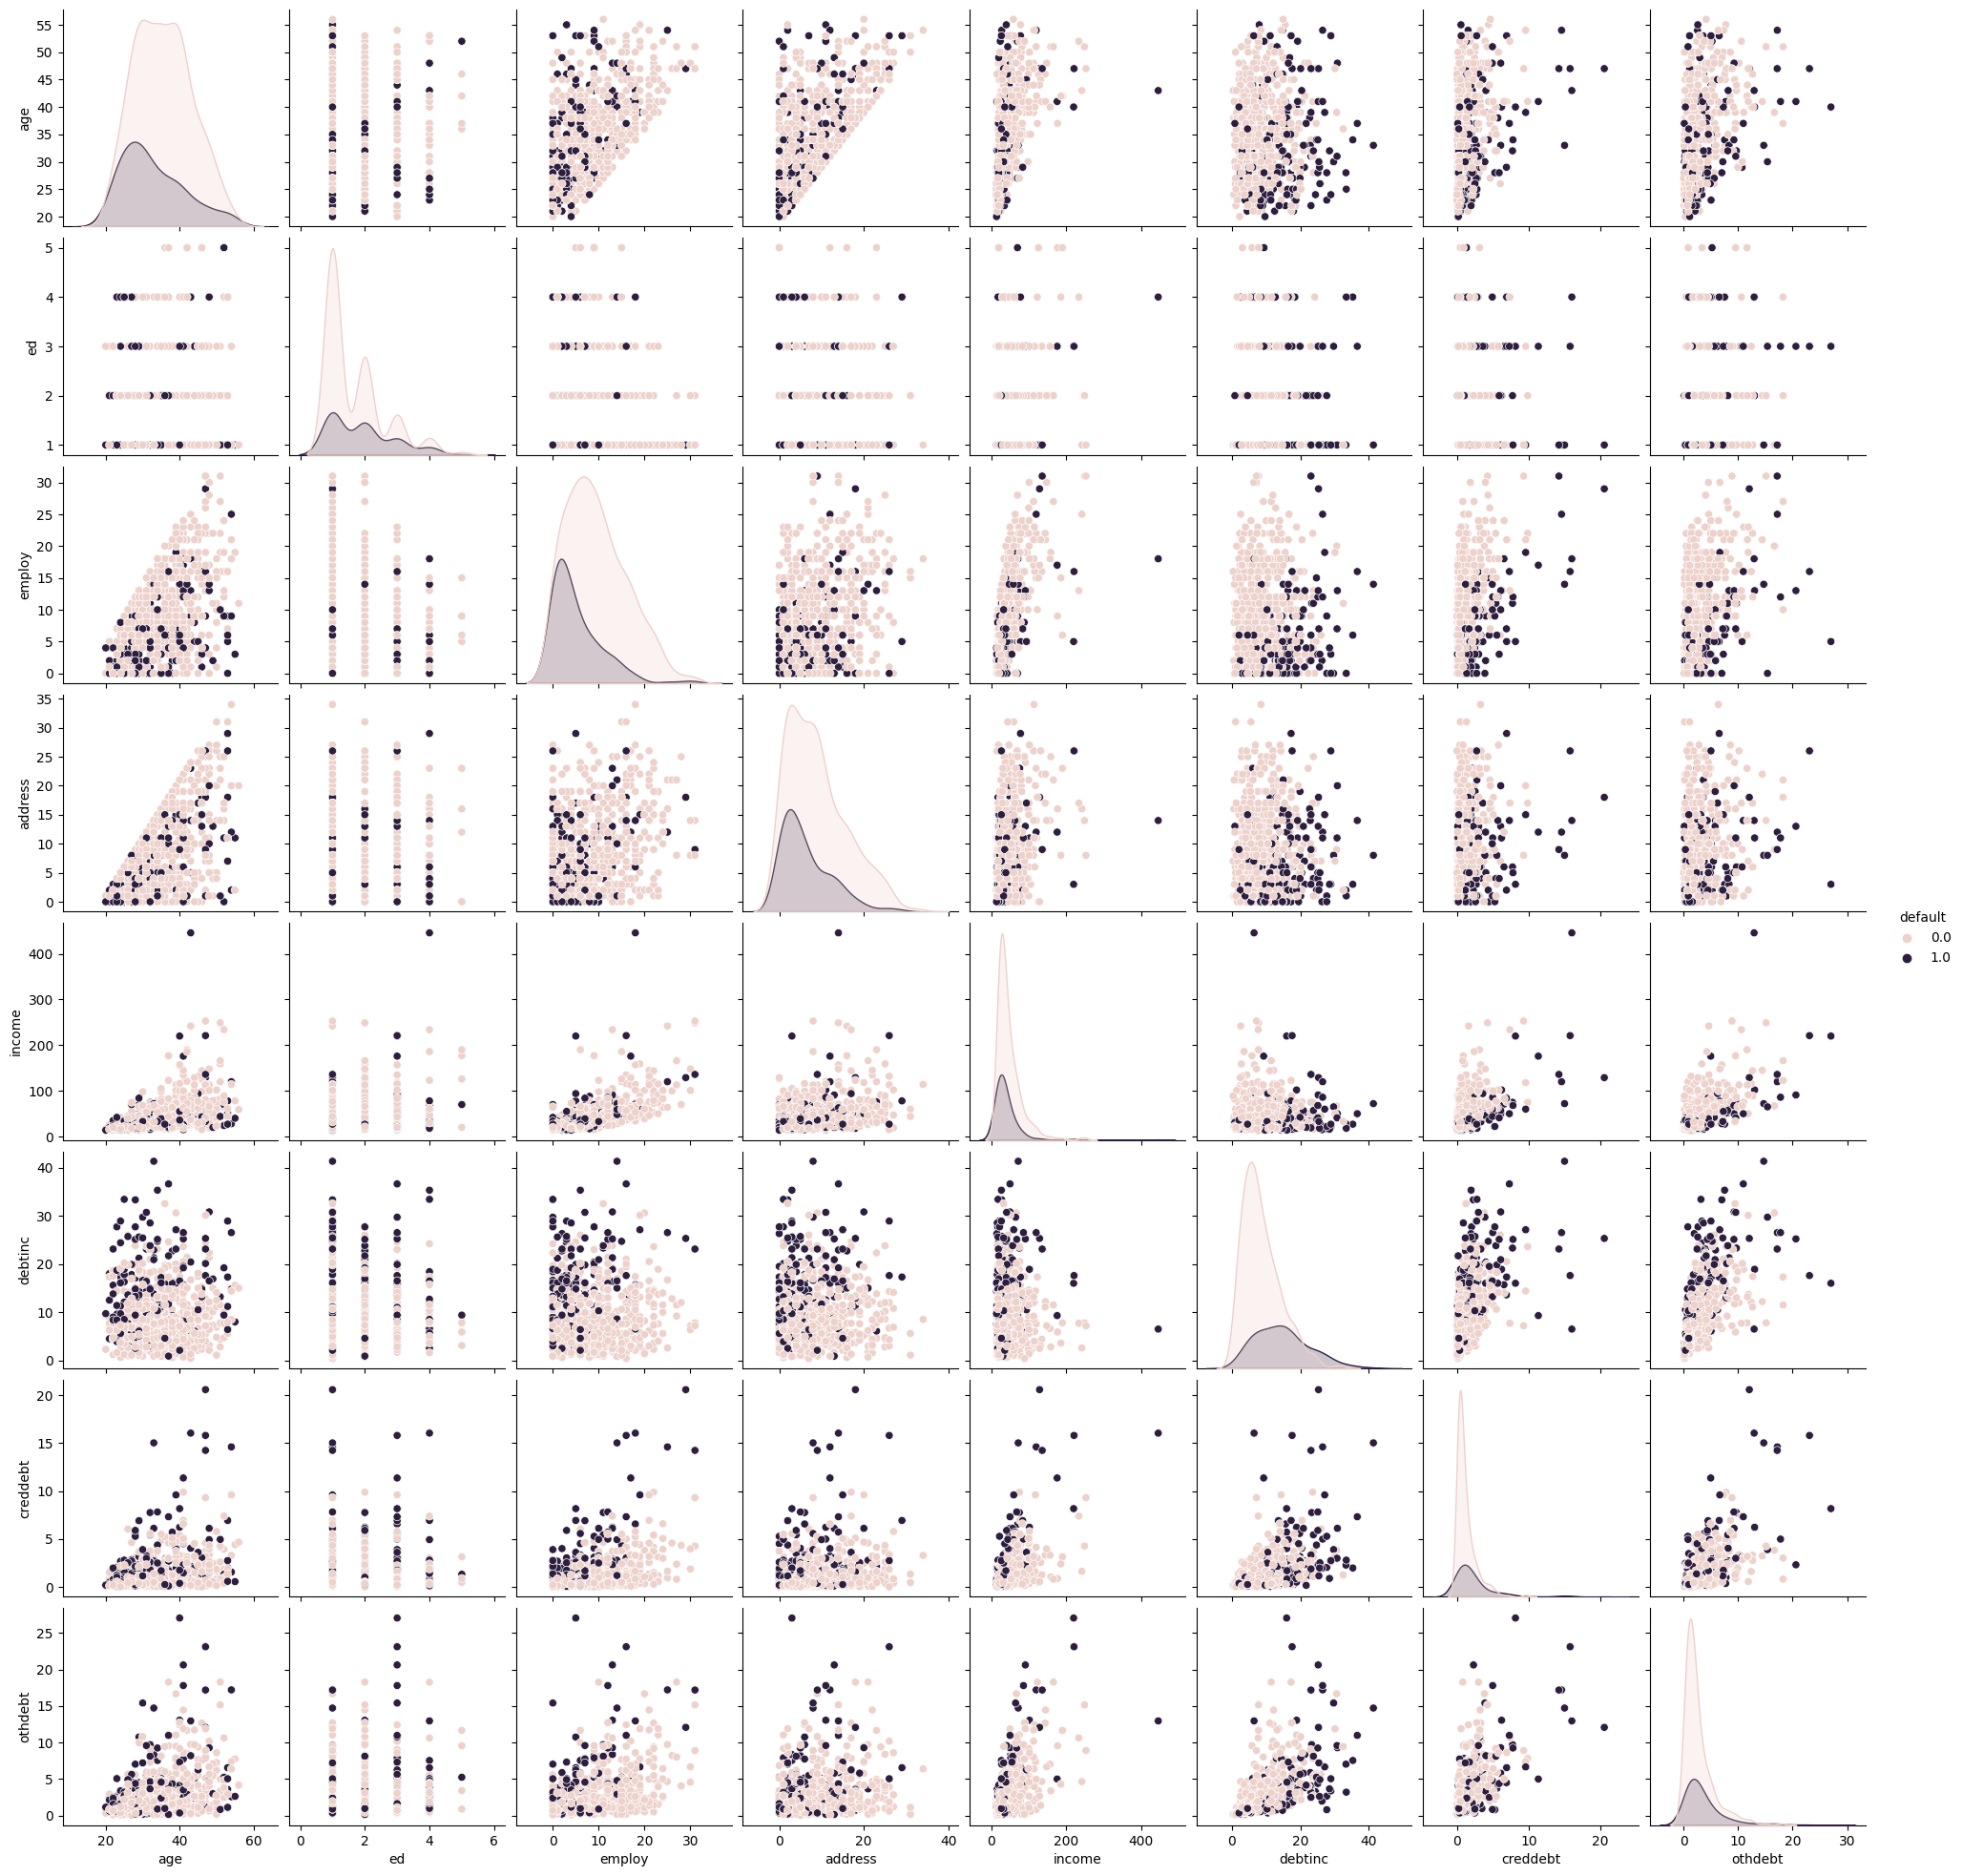

In [22]:
sns.pairplot(df, hue='default')

#### Corelation

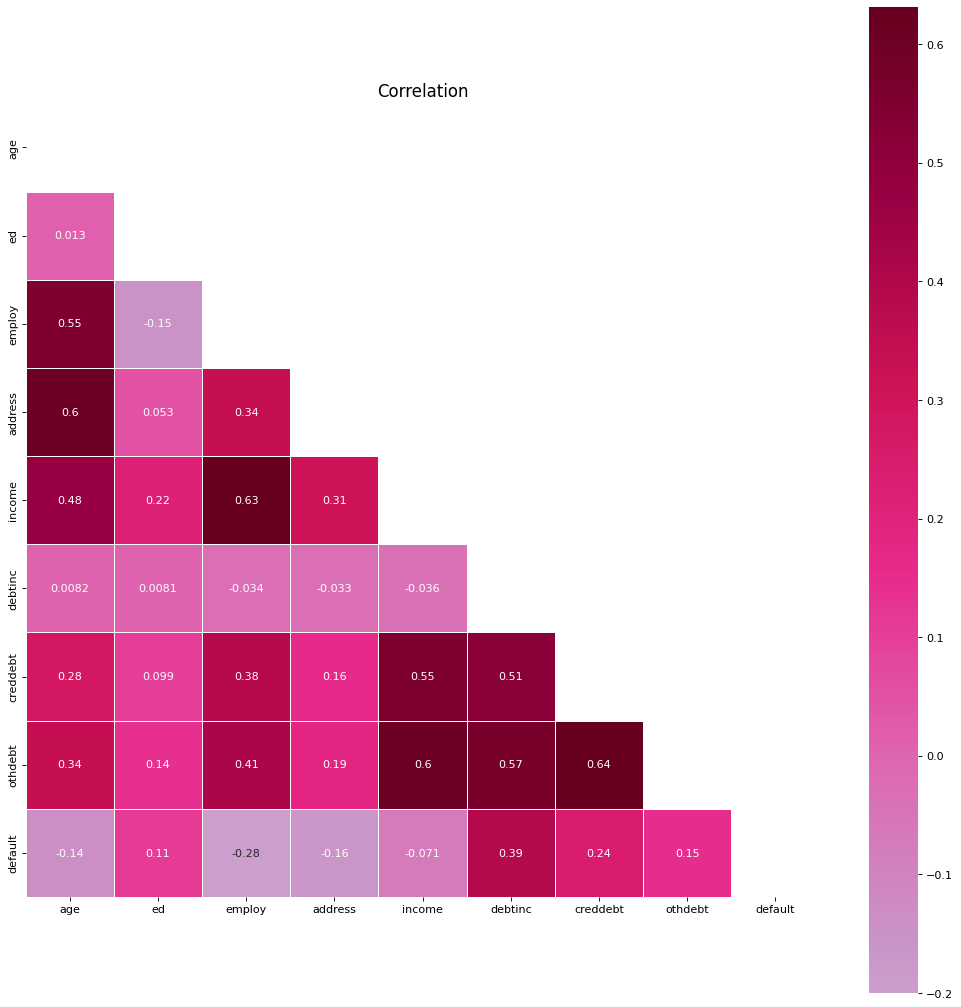

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(16,16),dpi=80)
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='PuRd', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()
# Save the figure
plt.savefig('corr_1.png', dpi=300, bbox_inches='tight')

#### Insights:

- There is a strong positive correlation between age, employ, address, and income. This could indicate that people who are older, have higher education, are more employed, and have a higher income tend to have a higher address.
- There is a positive correlation between education (ed) and income, and a negative correlation between ed and employ. This could mean that people with higher education tend to have higher income but less employment.
- There is a weak positive correlation between debtinc and default, indicating that higher debt-to-income ratio could increase the likelihood of defaulting.
- There is a positive correlation between creddebt and othdebt, which means that people who have more credit card debt are also likely to have other types of debt.
- There is a weak negative correlation between default and the other variables. This could indicate that none of the variables have a strong predictive power for default.

#### Checking the outliers

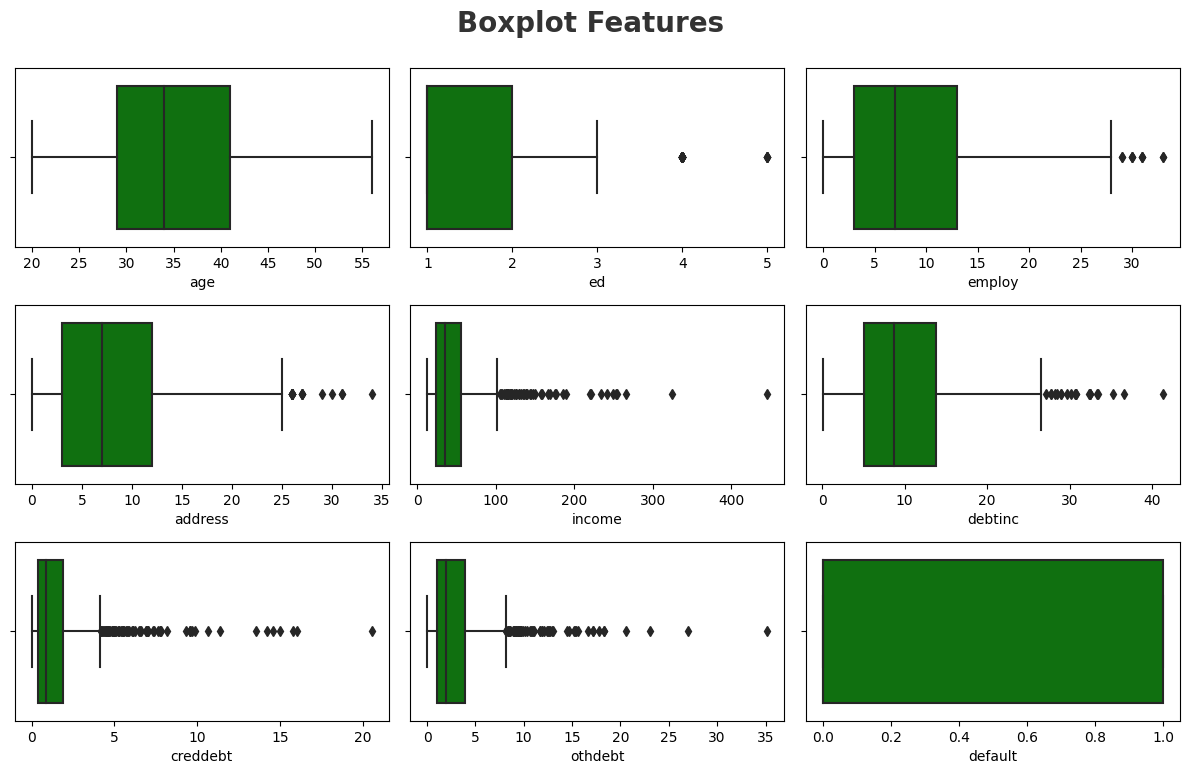

In [24]:
# Boxplot to find out the outlier
plt.figure(figsize=(12,12))
plt.suptitle("Boxplot Features ",fontsize = 20, fontweight = 'bold',alpha = 0.8, y =1)

for i in range (0,len(num_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df[num_features[i]],color = 'g')
    plt.xlabel(num_features[i])
    plt.tight_layout()
    

#### Insights:

- DataFrame have outliers.

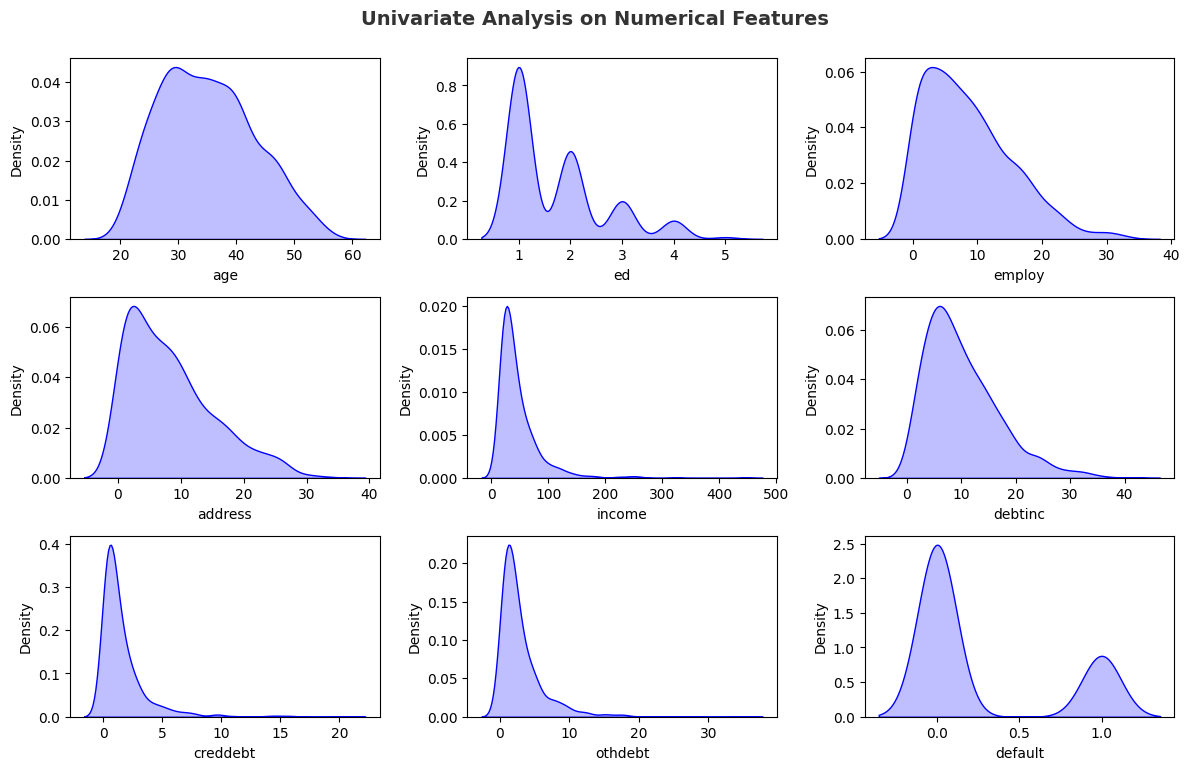

In [25]:
# Univariate Analysis on Numerical Features

#Set the figure size and title # alpha will control the transparency of the plot & y=1 the subtitple will be at the top of the figure & 0 will be at bottom
plt.figure(figsize = (12,12))
plt.suptitle('Univariate Analysis on Numerical Features', fontsize = 14, fontweight = "bold", alpha = 0.8, y = 1)

# loop through each numerical features and plot its density plot 
for i in range(0,len(num_features)): #0 represents the start of index since python starts with 0 index
    plt.subplot(5,3, i+1) #create a subplot for each feature
    sns.kdeplot(x = df[num_features [i]], shade = True, color = 'b') # kde is a density plot and shade will add color below the curve
    plt.xlabel(num_features[i]) # Add labels to x-axis
    plt.tight_layout()
    
    

In [26]:
df.skew()

age         0.335037
ed          1.216846
employ      0.862663
address     0.923791
income      3.700761
debtinc     1.124999
creddebt    3.701900
othdebt     3.206023
default     1.088198
dtype: float64

#### Insights:

- we can see that the income, creddebt, and othdebt columns have high positive skewness values. This indicates that these columns have a distribution that is heavily skewed to the right, with a long tail of high values. On the other hand, the ed and default columns have positive skewness values, while the other columns have skewness values close to zero, indicating that their distributions are relatively symmetric.

In [27]:
df.kurt()

age         -0.657550
ed           0.718983
employ       0.379201
address      0.256799
income      22.485763
debtinc      1.387694
creddebt    19.500145
othdebt     16.635286
default     -0.818171
dtype: float64

#### Insights:

> we can see that the income, creddebt and othdebt variables have kurtosis values greater than 3, which indicates that they have more values clustered around the mean compared to a normal distribution. This is also reflected in the positive skewness values for these variables.

> Overall, these findings suggest that the income, creddebt and othdebt variables are likely to have distributions that are heavily skewed to the right, with many values clustered around the mean and fewer values distributed towards the tails of the distribution.

### 5. Data Pre-Processing (Feature Engineering and Feature Selection)

#### 5.1 Select the features

>Imputing NaN values in the target variable is not recommended because it can introduce bias in your analysis. Instead, you can consider dropping the rows with missing values in the target variable if they are relatively small in number compared to the total size of your dataset.

>So lets drop the rows with missing values in the target variable.


In [28]:
df.dropna(subset=['default'], inplace=True)


In [29]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [30]:
df['default'] = df['default'].astype(int)

In [31]:
# Export to Excel
#df.to_excel("/config/workspace/dataset/Clean_Bankloan.xlsx", index=False)

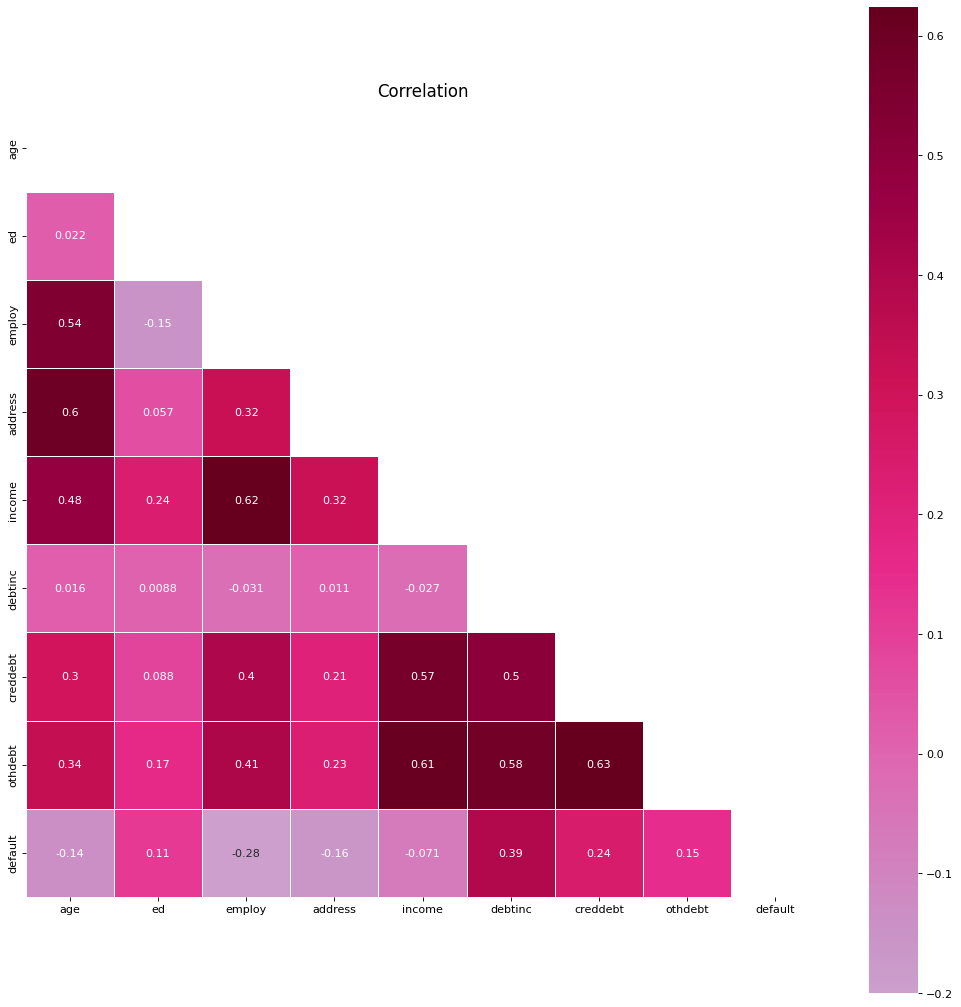

In [32]:
plt.figure(figsize=(16,16),dpi=80)
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='PuRd', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()


In [33]:
corr

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


#### use VIF to reduce variables

In [87]:
def drop_high_vif_columns(df, threshold=5):
    # create a list of column names to exclude from VIF calculation
    excluded_cols = [col for col in df.columns if df[col].dtype == 'object']
    # create a DataFrame for storing VIF results
    vif_df = pd.DataFrame(columns=['feature', 'vif'])
    # calculate VIF for each feature
    for i, feature in enumerate(df.columns):
        if feature not in excluded_cols:
            vif = variance_inflation_factor(df.values, i)
            vif_df = vif_df.append({'feature': feature, 'vif': vif}, ignore_index=True)
    # identify columns with high VIF values and drop them
    high_vif_cols = vif_df[vif_df['vif'] > threshold]['feature'].values
    if len(high_vif_cols) > 0:
        print(f"Columns with high VIF values: {', '.join(high_vif_cols)}")
        df.drop(high_vif_cols, axis=1, inplace=True)
    else:
        print("No columns with high VIF values found.")
    return df


In [35]:
drop_high_vif_columns(df, threshold=5)

Columns with high VIF values: age, employ, income, debtinc, othdebt


,ed,address,creddebt,default
0,3,12,11.359392,1
1,1,6,1.362202,0
2,1,14,0.856075,0
3,1,14,2.658720,0
4,2,0,1.787436,1
...,...,...,...,...
695,2,15,0.262062,1
696,2,4,0.369495,0
697,1,3,0.491264,0
698,1,22,2.302608,0


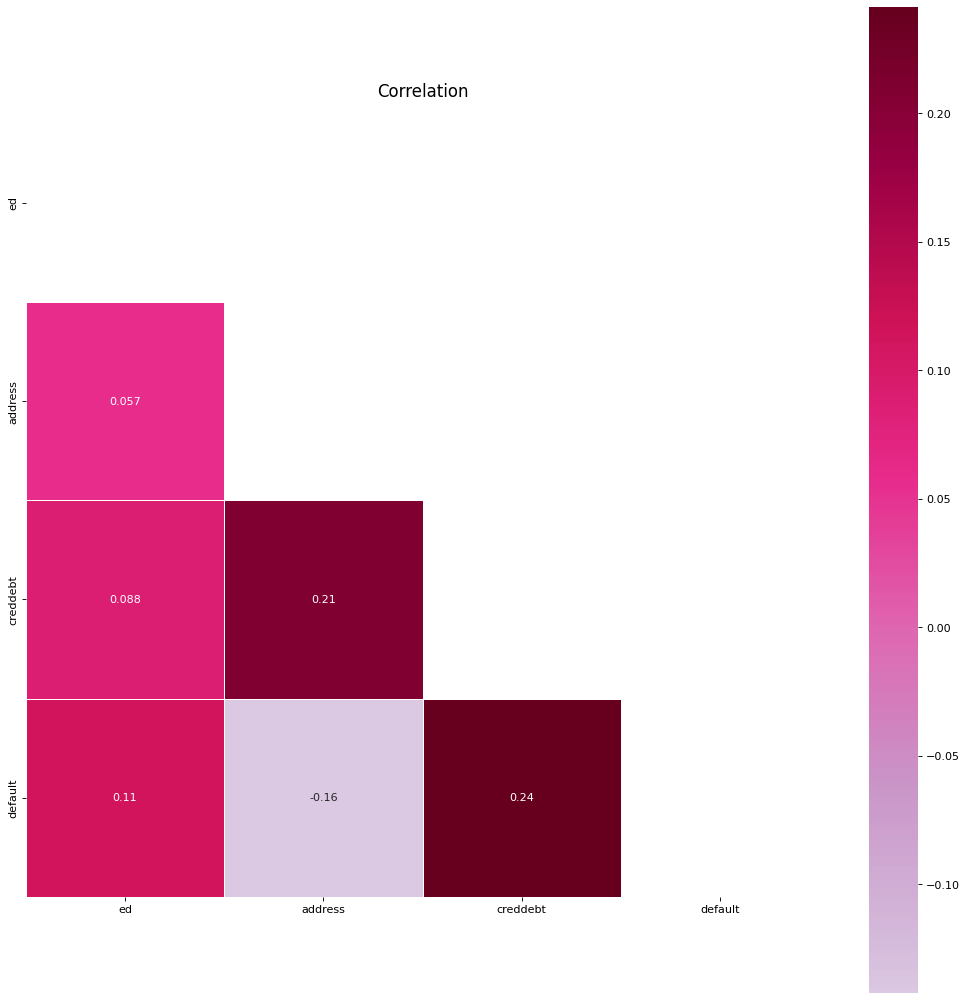

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(16,16),dpi=80)
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='PuRd', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()


In [37]:
# Export to Excel
#df.to_excel("/config/workspace/dataset/Clean & Selected BankLoan.xlsx", index=False)

In [16]:
df_new = pd.read_excel("/config/workspace/dataset/Clean & Selected BankLoan.xlsx")

default
0    517
1    183
Name: count, dtype: int64


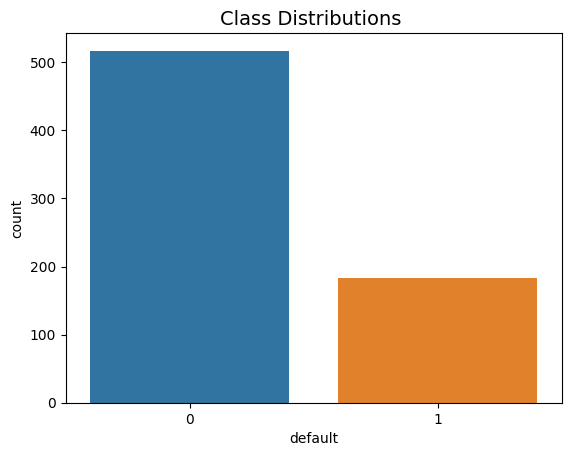

In [18]:
print(df_new['default'].value_counts())
sns.countplot(x='default', data=df_new)
plt.title('Class Distributions ', fontsize=14)
plt.show()

### 5.2 Upsampling with Smote

>  Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

In [26]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]


In [28]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
X, y = smote.fit_resample(X, y)

In [29]:
y = y.to_frame()


default
0          517
1          517
Name: count, dtype: int64


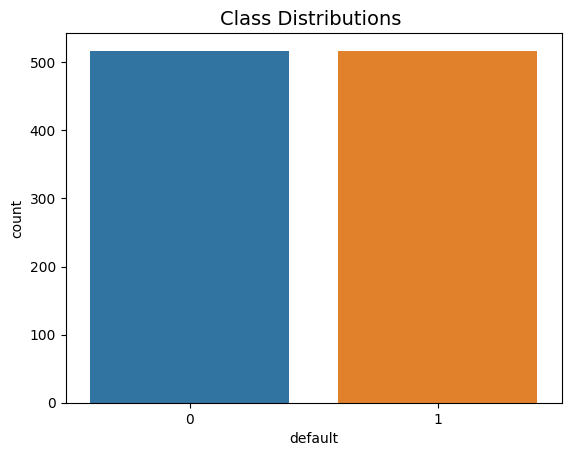

In [30]:
print(y.value_counts())
sns.countplot(x='default', data=y)
plt.title('Class Distributions ', fontsize=14)
plt.show()

### 5.3  Data Standardization and splitting data into training and testing

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ed        700 non-null    int64  
 1   address   700 non-null    int64  
 2   creddebt  700 non-null    float64
 3   default   700 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.0 KB


In [48]:
categorical_cols = []
numerical_cols = ['ed', 'address','creddebt']

In [50]:
scaler = StandardScaler()
scaler.fit(df_new[numerical_cols])

StandardScaler()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.20, random_state = 42)

In [58]:
print('Train Data Set', X_train.shape, y_train.shape)
print('Test Data Set', X_test.shape, y_test.shape)

Train Data Set (827, 3) (827,)
Test Data Set (207, 3) (207,)


# 6. Model Training

## Model Training Automation

In [53]:

models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier()

}

In [55]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report


In [56]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.7632850241545893,
 'Logistic Regression': 0.6570048309178744,
 'Decision Tree': 0.6714975845410628}

## 7. Hypeparameter Tuning

In [57]:
classfier=RandomForestClassifier()

In [58]:
## Gridsearchcv
from sklearn.model_selection import GridSearchCV

In [91]:
params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}


In [62]:
%%time
clf = GridSearchCV(classfier, param_grid=params, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)

CPU times: total: 0 ns
Wall time: 14 ms


In [65]:
%%time
## Splitting of Train data to validation data
clf.fit(X_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
CPU times: total: 22.2 s
Wall time: 15min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [66]:
clf.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

## 8. Choose best model

In [67]:
classifier = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini', max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=300)


In [68]:
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=300)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Prediction 
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[77 24]
 [27 79]]
0.7536231884057971
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       101
           1       0.77      0.75      0.76       106

    accuracy                           0.75       207
   macro avg       0.75      0.75      0.75       207
weighted avg       0.75      0.75      0.75       207



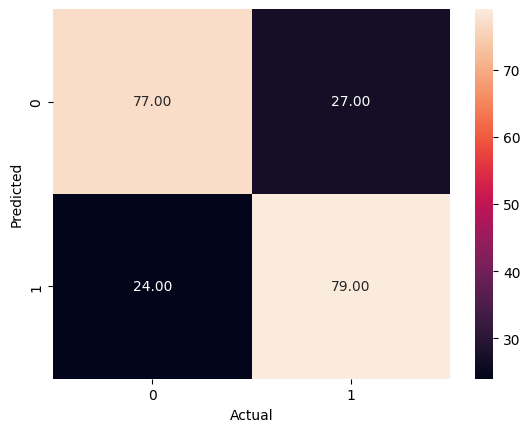

In [79]:
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f' )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()
    
draw_cm(y_test, y_pred)

In [98]:
# Save the trained model to a file using pickle
with open("/config/workspace/models/classifier.pkl", 'wb') as f:
    pickle.dump(classifier, f)


In [59]:
# Save the trained model to a file using pickle
with open("/config/workspace/models/scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)